## [LAB-08] 2.워드클라우드 (한글)
--- 
### #01. 형태소 분석의 이해
---
1. 형태소
- 의미가 있는 최소 단위(minimally meaningful unit)를 뜻하는 말로 문법적으로 더 이상 나눌 수 없는 언어 요소를 의미한다.
- 영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야함(konlpy, mecab 등)

2. 형태소 분석 예시
- 형태소 사전에 수록된 어휘를 기준으로 분석

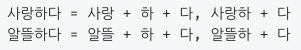
### #02. KoNLPy(OKT)를 사용한 형태소 분석
--- 
KoNLPy는 한국어 정보처리를 위한 파이썬 패키지

JAVA를 기반으로 만들어져 있어서 JAVA 개발 환경 필요 (터미널에서 javac --version으로 확인)

4. 형태소 분석 테스트

In [1]:
from IPython.display import Image
from wordcloud import WordCloud

#한글 형태소 분석기|
from konlpy.tag import Okt

#패키지의 데이터관련 정보를 갖는 객체 --> 설치 위치 파악용
from konlpy import data

#파이썬 내장 클래스 --> 설치 불필요
from collections import Counter
import os

In [2]:
import jpype

In [3]:
nlp = Okt()

In [4]:
sample = """개봉했을때부터 지금까지 마음이 답답하거나 힘들때
이영화 보고있어요 그때마다 심적인 위로를 받을수있는 영화같아요
장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다.
알잘딱깔센 위쑤시개 얼죽아"""

nouns = nlp.nouns(sample)
print(nouns)


['개봉', '때', '지금', '마음', '때', '이영화', '그때', '심', '위로', '영화', '장면', '하나', '하나', '마음', '남아', '여운', '영화', '위', '개', '얼']


In [5]:
for p in data.path:
  path = os.path.abspath(p)
  print(path, "-->", os.path.exists(path))

C:\Users\itwill\konlpy_data --> False
C:\konlpy_data --> False
D:\konlpy_data --> False
E:\konlpy_data --> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\konlpy_data --> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\lib\konlpy_data --> False
C:\Users\itwill\AppData\Roaming\konlpy_data --> False
C:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\konlpy\data --> True


### #03. 대한민국 헌법 형태소 분석
--- 
1. 분석할 데이터 가져오기

In [6]:
with open("wordcloud/대한민국헌법.txt", "r", encoding="utf-8") as f:
    text=f.read()

2. 데이터에 대한 형태소 분석

In [7]:
nlp = Okt()
nouns = nlp.nouns(text)

3. 불용어 제거하기

(1) 불용어 목록 가져오기

In [8]:
with open("wordcloud/stopwords-ko.txt", "r", encoding="utf-8") as f:
    stopwords = f.readlines()

    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

(2) 추출된 명사에서 불용어를 제거함

In [9]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

(3) 리스트로부터 빈도수 측정

In [10]:
count = Counter(data_set)
count

Counter({'법률': 127,
         '정': 89,
         '수': 88,
         '대통령': 83,
         '국가': 73,
         '국회': 68,
         '국민': 61,
         '관': 58,
         '헌법': 53,
         '모든': 37,
         '바': 37,
         '위': 36,
         '사항': 23,
         '권리': 21,
         '안': 21,
         '의원': 21,
         '자유': 20,
         '정부': 20,
         '선거': 20,
         '임명': 20,
         '직무': 19,
         '국무총리': 19,
         '경제': 18,
         '의무': 18,
         '조직': 18,
         '국회의원': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '국무위원': 17,
         '대법원': 17,
         '범위': 16,
         '장': 15,
         '법관': 15,
         '보호': 14,
         '정책': 14,
         '정당': 14,
         '헌법재판소': 14,
         '재적': 14,
         '회의': 14,
         '항의': 14,
         '관리': 14,
         '노력': 13,
         '보장': 13,
         '거나': 13,
         '요구': 13,
         '법원': 12,
         '집회': 12,
         '과반수': 12,
         '출석': 12,
         '찬성': 12,
     

4. 단어 빈도수 시각화

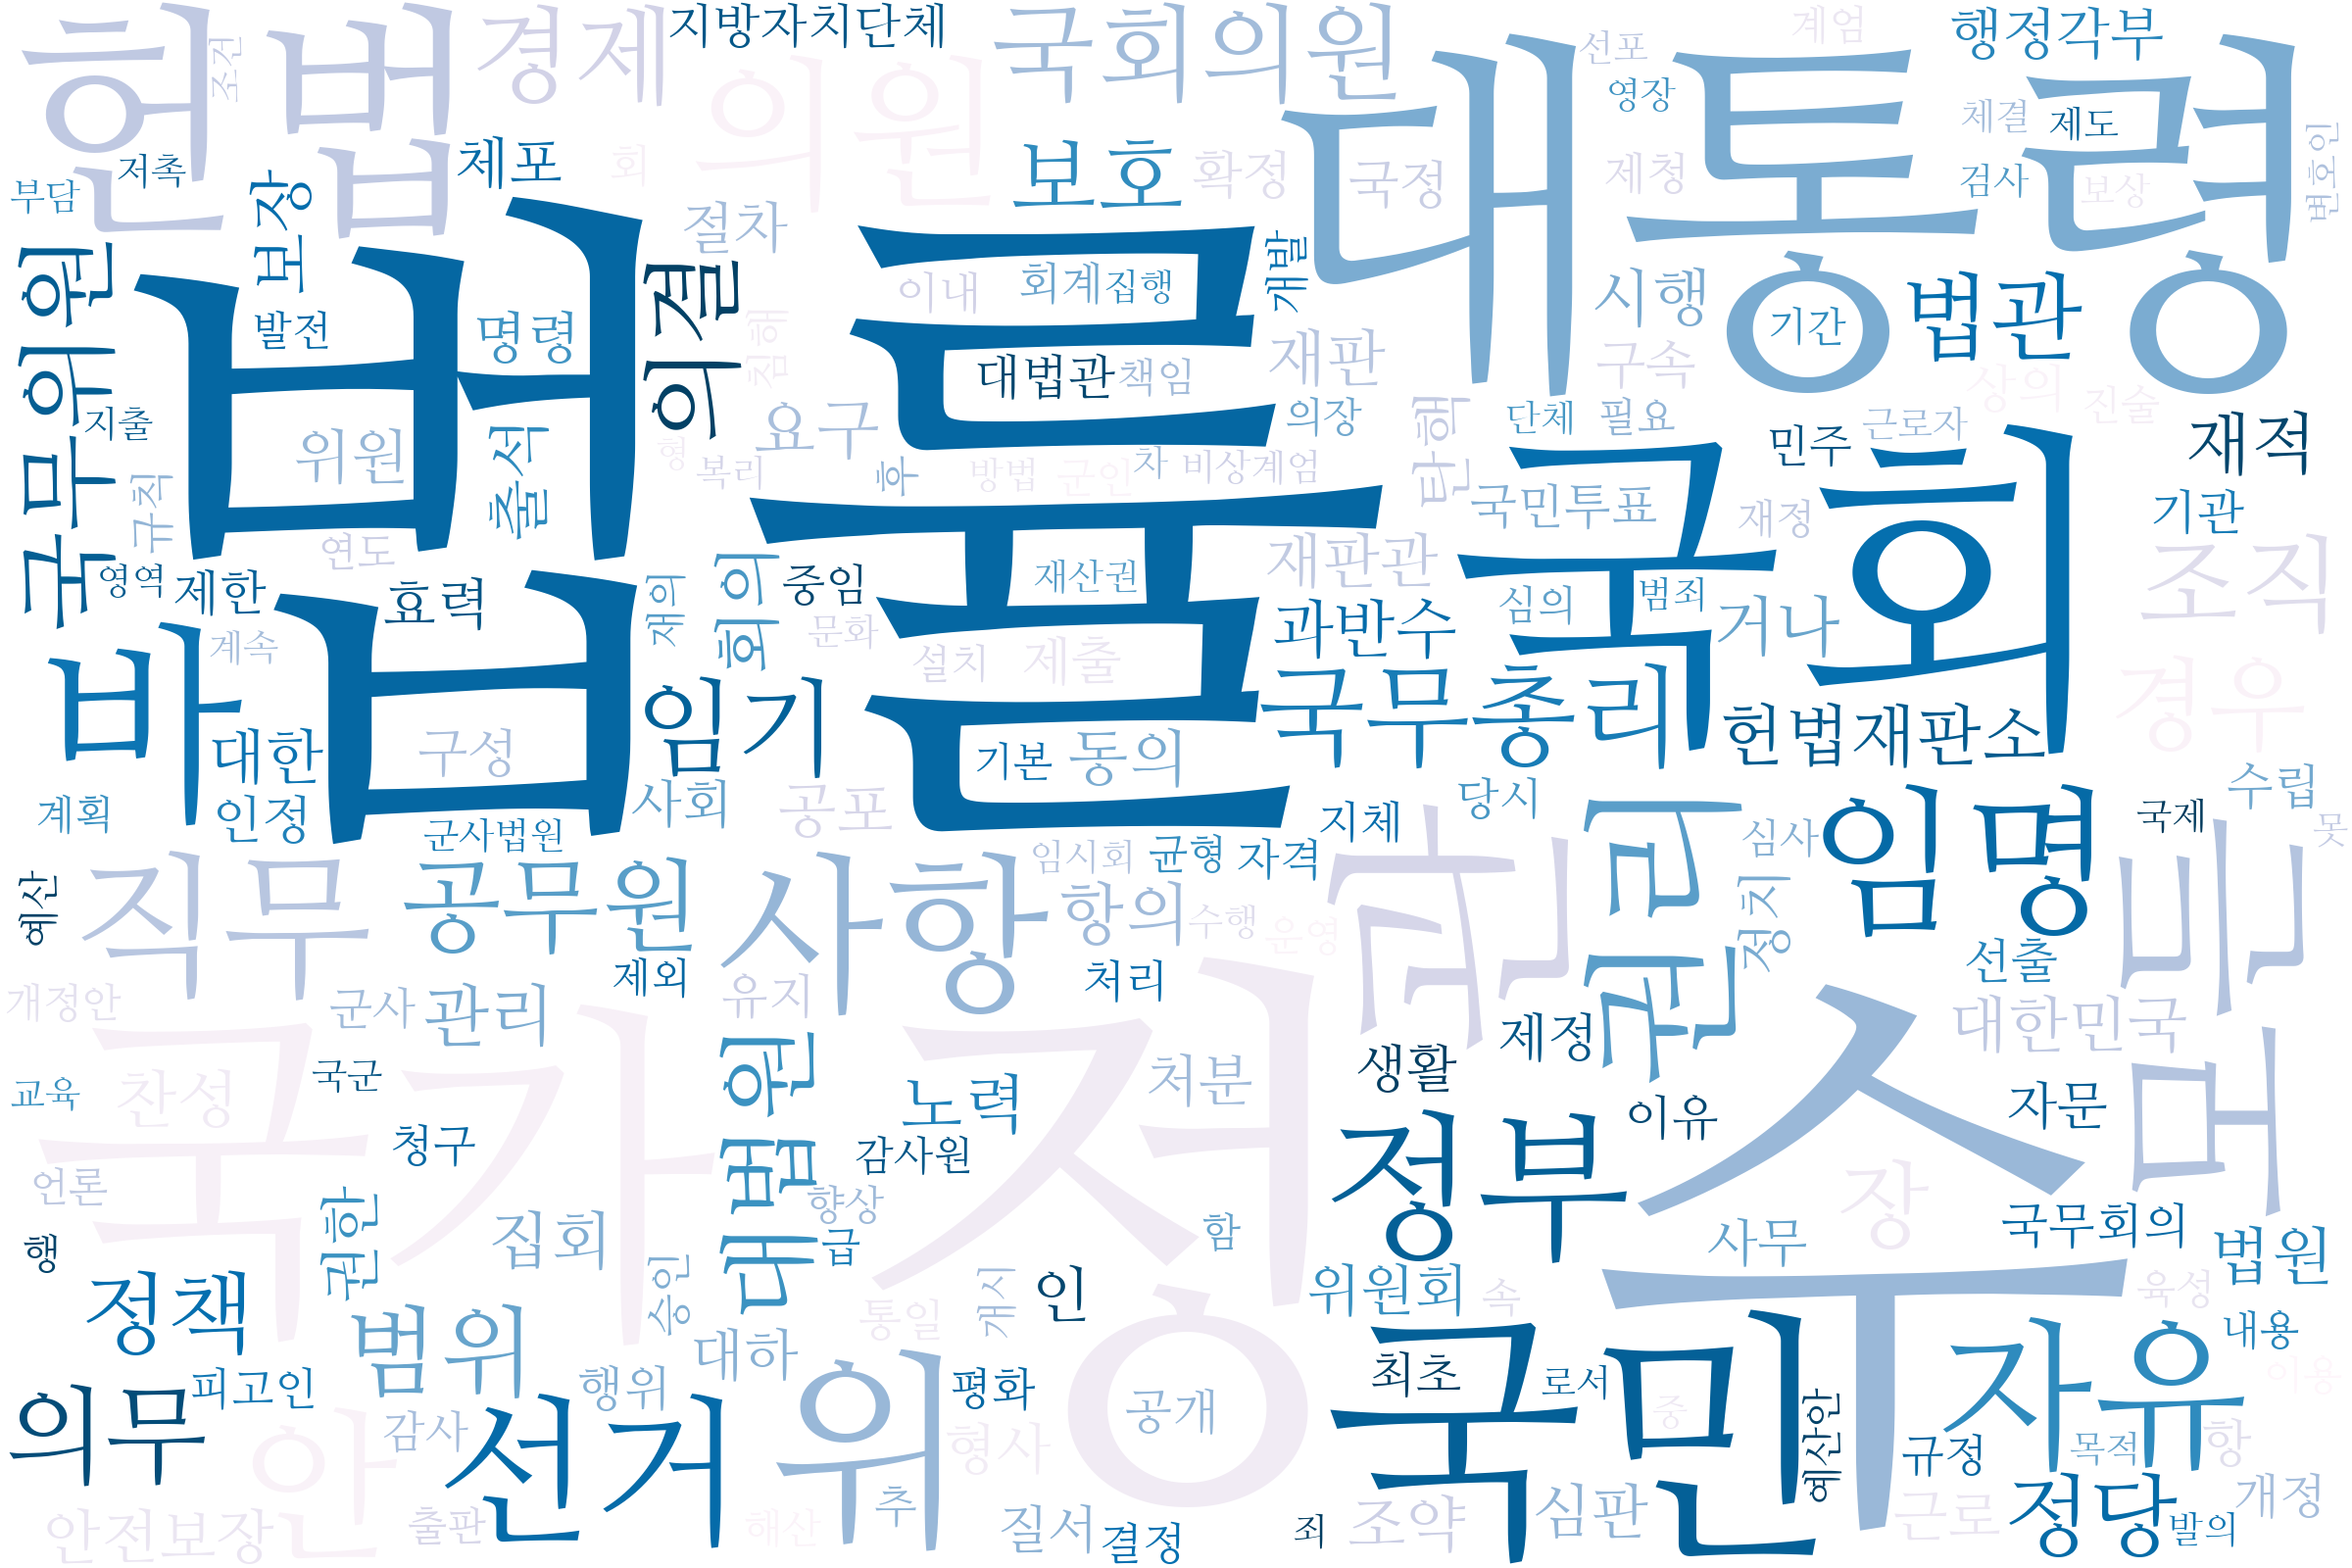

In [11]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(
    font_path="./wordcloud/NanumMyeongjo.ttf",
    width = 1200,
    height=800,
    scale=2.0,
    background_color="#ffffff",
    colormap="PuBu",
)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
Image(filename="대한민국헌법-주요단어.png")